In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [32]:
import pandas as pd
import math as mt

from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

## 사용자 메일 박스 조회

In [52]:
mail_box_id = "62398a5f01a3618816f027ae"

tracks = db.get_mail_box(mail_box_id)
tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,4MidkNeonif4PcWSjkwOb7,Don’t,"2e4G04F77jxVuDYo44TCSm,7bmYpVgQub656uNTu6qGNQ","Loco,Hwa Sa"
2,5WitNasXEIRptoLIQUcXMx,Décalcomanie,0XATRDCYuuGhk0oE7C0o5G,MAMAMOO


## 사용자에게 추천된 음악 확인

In [80]:
reco_tracks = db.get_mail(mail_box_id)
reco_tracks.head()

,id,name,artists,artists_name
0,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,0aLqNqF7BeSrMBHoWj0aba,나빠,6aLdhHUqgdKE86xbtNmY8g,Crush
2,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park
3,4koDrJbYxIlcDY4gu2a4I8,WHO DO U LOVE? (feat. French Montana),4TnGh5PKbSjpYqpIdlW5nz,Monsta X
4,44f1TNdoQUgf3PUYraCTsH,BLACK,30b9WulBM8sFuBo17nNq9c,G-DRAGON


## 사용자가 맘에 들었던 음악 Select (Random 하게)

In [81]:
sel_tracks = reco_tracks.sample(n=mt.floor(len(reco_tracks) * 0.075))

sel_tracks.head()

,id,name,artists,artists_name
61,6BKOhvRPY54uvfqWwg7MKi,Up & Down,1xs6WFotNQSXweo0GXrS0O,EXID
62,59FBFyeST1vqN8G41YgFS6,SHAKE IT,2wTLheTmMcFCA4hdY8hZJP,SISTAR
88,7xu4eZbetgidyJmoZbwPsk,Siren,6MoXcK2GyGg7FIyxPU5yW6,SUNMI
77,6lHmnk1sUIPS9EI836eObc,Plz Don’t Be Sad,3T0fMfxYBU3q9oAUAdPIsr,Highlight
73,5BfBVr2vacXxUKbAH7JCDd,Peppermint Chocolate (feat.Whee sung),"1XNC9ksvgXeD1xRJruSA5t,0XATRDCYuuGhk0oE7C0o5G","K.Will,MAMAMOO"


## 재추천

In [82]:
# 1. Get Token
token = spotify.get_token()

genres = spotify.get_genres(token, sel_tracks)

og_features = spotify.get_features(token, tracks)
reply_features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(reply_features)

In [83]:
recos = spotify.get_recommend(sel_tracks,reply_features, genres, token,
                             og=tracks)
reco_features = spotify.get_features(token, recos)
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0dSE54vYYvRNWzVTxE2xTL,0.709,0.911,7,-2.611,0.0593,0.0572,0.000005,0.0732,0.779,106.972
1,3A5djNQe8IW4XPWQaplZO7,0.792,0.828,7,-3.099,0.0423,0.0371,0.000000,0.2780,0.721,126.993
2,0icGgAiUx5b0amQLycmGUr,0.729,0.893,7,-1.896,0.0476,0.1280,0.000000,0.1670,0.453,104.977
3,2cUzIBGMvx2BZ2Q1fzjdl1,0.743,0.689,7,-2.846,0.0289,0.0198,0.000000,0.7080,0.504,104.936
4,0mbegn9oAhJyfL0xEq3r9a,0.736,0.806,7,-2.709,0.3280,0.0298,0.000000,0.0847,0.763,120.040


In [84]:
# 합치기
sel_tracks = pd.concat([tracks,sel_tracks], ignore_index=True)
features = pd.concat([og_features, reply_features], ignore_index=True)

features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.37700,0.000000,0.0927,0.428,97.133
1,4MidkNeonif4PcWSjkwOb7,0.849,0.486,1,-7.049,0.0669,0.53800,0.000000,0.1270,0.546,92.022
2,5WitNasXEIRptoLIQUcXMx,0.648,0.859,10,-2.384,0.0472,0.11300,0.000000,0.4480,0.541,115.434
3,6BKOhvRPY54uvfqWwg7MKi,0.714,0.812,7,-2.703,0.0351,0.00189,0.000002,0.2290,0.377,112.018
4,59FBFyeST1vqN8G41YgFS6,0.778,0.957,11,-2.570,0.0735,0.02340,0.000000,0.7150,0.611,118.997


In [87]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.000000,0.666225,0.727273,0.524859,0.497182,0.416568,0.000000,0.070559,0.411254,0.220158
1,4MidkNeonif4PcWSjkwOb7,0.832090,0.350993,0.090909,0.447616,0.093348,0.594470,0.000000,0.110695,0.539431,0.182149
2,5WitNasXEIRptoLIQUcXMx,0.457090,0.845033,0.909091,0.813441,0.048929,0.124851,0.000000,0.486309,0.534000,0.356258
3,6BKOhvRPY54uvfqWwg7MKi,0.580224,0.782781,0.636364,0.788425,0.021646,0.002076,0.000003,0.230049,0.355855,0.330854
4,59FBFyeST1vqN8G41YgFS6,0.699627,0.974834,1.000000,0.798855,0.108230,0.025845,0.000000,0.798736,0.610037,0.382756


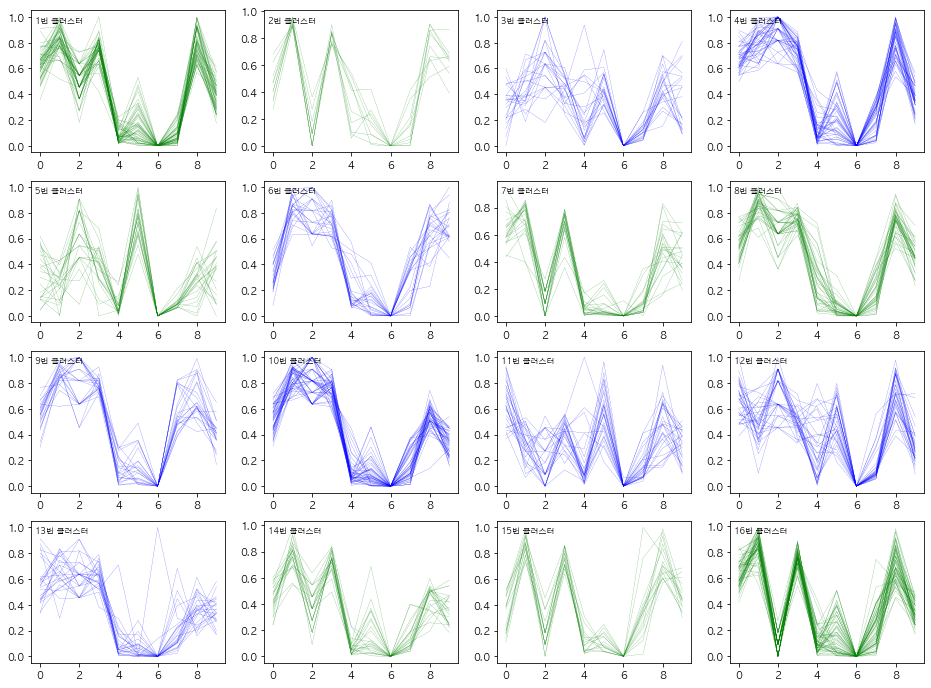

In [88]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)

In [89]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

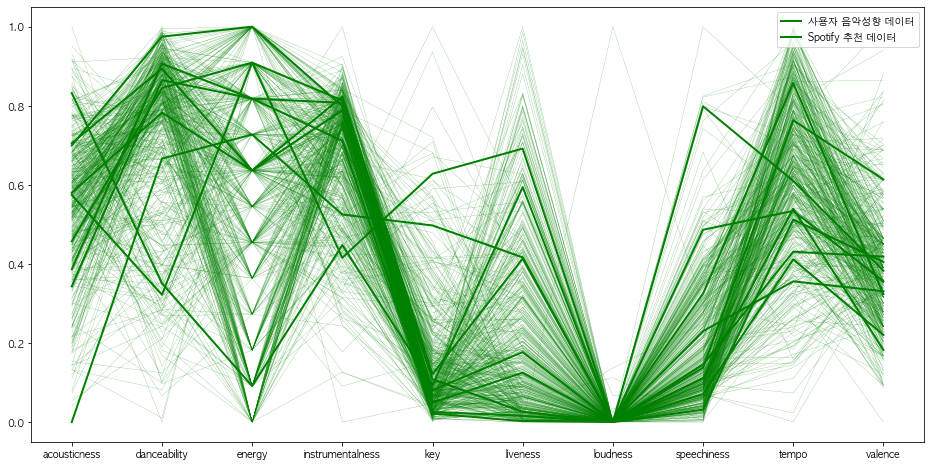

In [90]:
utils.visual_norm_data(sel_tracks, norm_features)

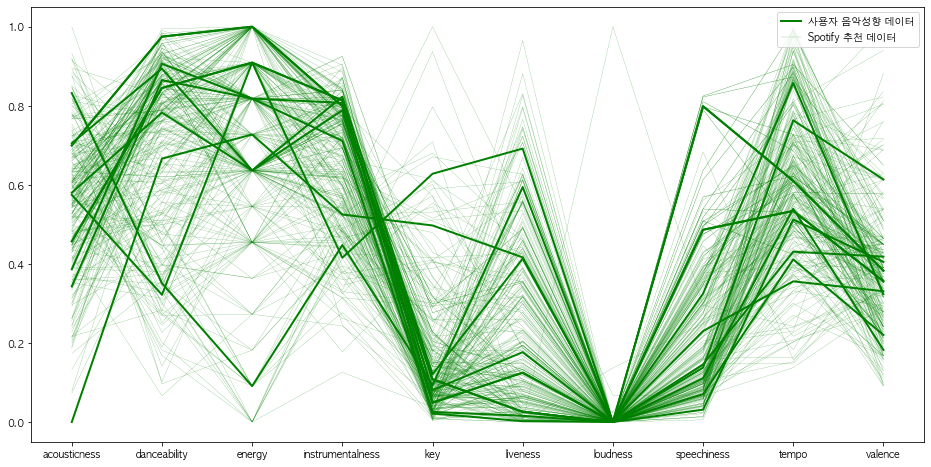

,id,name,artists,artists_name
2,0icGgAiUx5b0amQLycmGUr,Um Oh Ah Yeh,0XATRDCYuuGhk0oE7C0o5G,MAMAMOO
3,2cUzIBGMvx2BZ2Q1fzjdl1,NUNU NANA,64k5e9kV9MdukXjFrR5R37,Jessi
5,06vo9VVs7vzezRw3ZVQF0Y,Wave,"56HZvtrzD82YKMGGJTlIG2,6vPzAqZDXQgLTEn8pjp4jY,...","LUNA,AMBER,Xavi & Gi"
6,7n0D1iLva5zp4JcnlIMeVa,Wolf,3cjEqqelV9zb4BYE3qDQ4O,EXO
9,5gA9Xn8oPts2aewPgxVkPD,Heroine,6MoXcK2GyGg7FIyxPU5yW6,SUNMI


In [91]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [93]:
recos[reco_musics]

,id,name,artists,artists_name
2,0icGgAiUx5b0amQLycmGUr,Um Oh Ah Yeh,0XATRDCYuuGhk0oE7C0o5G,MAMAMOO
3,2cUzIBGMvx2BZ2Q1fzjdl1,NUNU NANA,64k5e9kV9MdukXjFrR5R37,Jessi
5,06vo9VVs7vzezRw3ZVQF0Y,Wave,"56HZvtrzD82YKMGGJTlIG2,6vPzAqZDXQgLTEn8pjp4jY,...","LUNA,AMBER,Xavi & Gi"
6,7n0D1iLva5zp4JcnlIMeVa,Wolf,3cjEqqelV9zb4BYE3qDQ4O,EXO
9,5gA9Xn8oPts2aewPgxVkPD,Heroine,6MoXcK2GyGg7FIyxPU5yW6,SUNMI
...,...,...,...,...
594,6KZ5tQzMzradTe0pxsfObz,Yellow Cab,0siBQaURCli5wn2lqv8WZg,DPR LIVE
595,5BVjsCcDlYgJG2bB2jsOeI,Winter Blossom (Prod. by 0channel),5enwJ9yOnKlCP91ov4Dqhv,punchnello
597,0apCIaqGTn0zJ2Xiwh8Ftg,Remember (feat. Ty Dolla $ign),2nDC4PH8XE1gHeeAxVLXRO,KATIE
598,14p5EKgbPx4U3P1j5JNHeh,"Cigarette (Feat. Tablo, MISO)",0dTj3SqwE8kPnCzyzvYzhT,offonoff


In [94]:
genres

,count
k-pop,7


In [95]:
spotify.get_genres(token,recos[reco_musics])

,count
k-pop,194
pop,6
edm,1
house,1


In [101]:
_sel_tracks = sel_tracks
_sel_tracks[[_ not in _sel_tracks['id'].values for _ in tracks['id']]]

ValueError: Item wrong length 3 instead of 9.

In [100]:
tracks

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,4MidkNeonif4PcWSjkwOb7,Don’t,"2e4G04F77jxVuDYo44TCSm,7bmYpVgQub656uNTu6qGNQ","Loco,Hwa Sa"
2,5WitNasXEIRptoLIQUcXMx,Décalcomanie,0XATRDCYuuGhk0oE7C0o5G,MAMAMOO
